Abriendo el dataset

C:\Users\jose-\AppData\Local\Temp\ipykernel_18988\746695557.py:1: DtypeWarning: Columns (12,14,16,17,18,19,20,24,25,26,27,28,29,30,31,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('hltb_data.csv')


Hay 7160 juegos con rating ESRB
Hay 3631 juegos con rating PEGI
Hay 1872 juegos con rating CERO
En total hay 12663 juegos con rating
Total de géneros únicos iniciales: 247
Se encontraron 159 géneros con posibles similitudes
Género agregado: simulation
Hay 1 géneros únicos
Género agregado: action
Hay 2 géneros únicos
Género agregado: adventure
Hay 3 géneros únicos
Género agregado: role-playing
Hay 4 géneros únicos
Género agregado: action rpg
Hay 5 géneros únicos
Género agregado: first-person
Hay 6 géneros únicos
Género agregado: shooter
Hay 7 géneros únicos
Género agregado: racing/driving
Hay 8 géneros únicos
Género agregado: top-down
Hay 9 géneros únicos
Género agregado: puzzle
Hay 10 géneros únicos
Género agregado: music
Hay 11 géneros únicos
Género agregado: platform
Hay 12 géneros únicos
Género agregado: sports
Hay 13 géneros únicos
Género agregado: card game
Hay 14 géneros únicos
Género agregado: roguelike
Hay 15 géneros únicos
Género agregado: various
Hay 16 géneros únicos
Género 

C:\Users\jose-\AppData\Local\Temp\ipykernel_18988\2776148033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(subset=['game_profile_genre'], inplace=True)  # Eliminamos filas sin género


Géneros únicos encontrados: ['simulation', 'action', 'adventure', 'role-playing', 'rpg', 'first-person', 'shooter', 'racing', 'driving', 'top-down', 'puzzle', 'music', 'platform', 'sports', 'card', 'game', 'roguelike', 'various', 'arcade', 'visual', 'novel', 'scrolling', 'vertical', 'third-person', 'on-rails', 'open', 'world', 'pinball', 'side', 'point-and-click', 'text', 'real-time', 'strategy', 'city-building', 'shoot-em-up', 'combat', 'flight', 'simulator', 'vehicular', 'sandbox', 'trivia', 'compilation', 'fighting', 'turn-based', 'tactical', 'survival', 'horror', 'massively', 'multiplayer', 'educational', 'historical', 'hack-and-slash', 'isometric', '3d', 'beat-em-up', 'stealth', 'hidden', 'object', 'rhythm', 'life', 'tower', 'defense', 'party', 'virtual', 'reality', 'multidirectional', 'light-gun', 'breakout', 'mecha', 'art', 'side-scroller', 'battle', 'arena', 'graphic', 'incremental', 'board', 'space', 'trading', 'tactics', 'casual', 'indie', 'interactive', 'american-football', 

C:\Users\jose-\AppData\Local\Temp\ipykernel_18988\277756356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="twilight", edgecolor='w', linewidth=1.5,  zorder=2, alpha = 0.6)


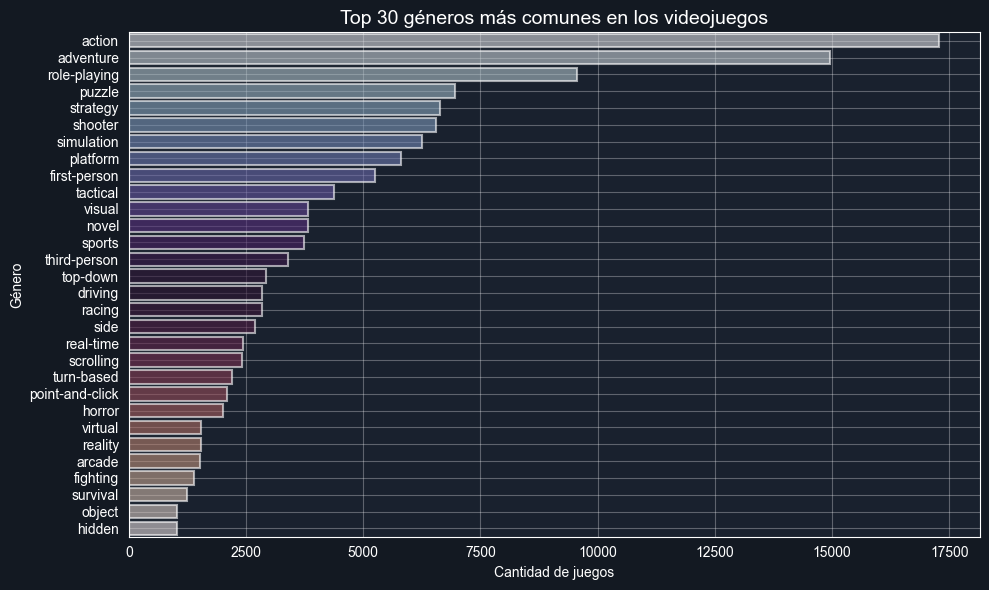

Hay 6906 juegos con rating
Hay 66112 juegos sin rating
Corresponde a un 9.46% de los juegos
Hay 70116 juegos con plataforma
Hay 2902 juegos sin plataforma
Corresponde a un 96.03% de los juegos
Hay 3574 plataformas únicas
game_game_type
game       66253
dlc         2226
multi       1816
sports       628
compil       590
endless      367
mod          331
hack         260
omit         182
delay         64
Name: count, dtype: int64
Hay 301 juegos sin tipo


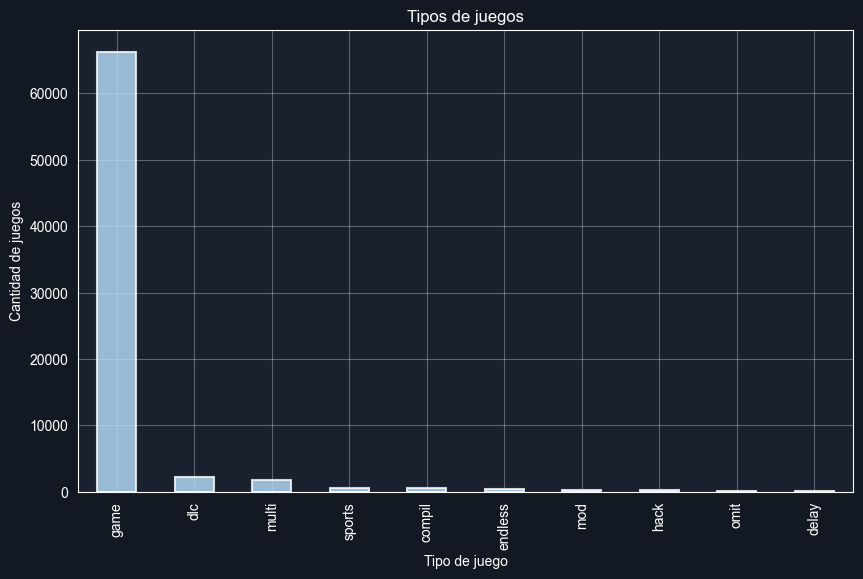

C:\Users\jose-\AppData\Local\Temp\ipykernel_18988\41632697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['game_comp_lvl'] = data_clean[['game_comp_lvl_sp', 'game_comp_lvl_co', 'game_comp_lvl_mp']].apply(lambda x:''.join(x.astype(str)), axis=1)


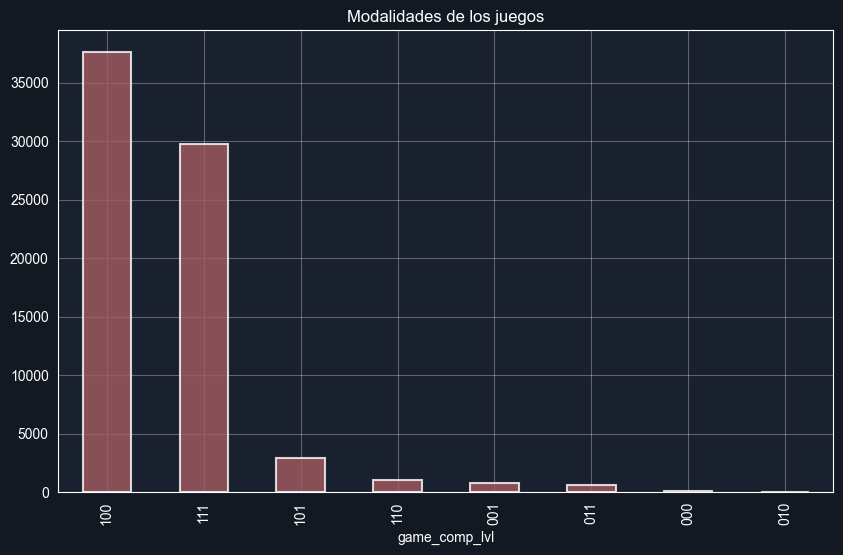

In [10]:
import pandas as pd
%run clean_data.ipynb

In [11]:
# Cargar CSV
df = data_clean

Se crea una tabla con atributos binarios para representar los generos de los juegos.

In [12]:
import pandas as pd

# Leer archivo de sinónimos
genre_map_df = pd.read_excel("genres_map.xlsx", header=None)

# Crear mapa de sinónimos → género principal
genre_map = {}
for row in genre_map_df.itertuples(index=False):
    row_values = [str(cell).strip() for cell in row if pd.notna(cell)]
    if not row_values:
        continue
    principal = row_values[0].strip().lower()  # género principal en minúsculas
    for synonym in row_values:
        genre_map[synonym.strip().lower()] = principal

# Subset del DataFrame
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_genre']].copy()
df_subset['game_profile_genre'] = df_subset['game_profile_genre'].fillna('')

# Normalizar géneros usando el mapa (case-insensitive)
def normalize_genres(genre_str):
    genres = [g.strip().lower() for g in genre_str.split(',') if g.strip()]
    normalized = set()
    for g in genres:
        mapped = genre_map.get(g, g)  # busca en minúsculas
        normalized.add(mapped)
    return list(normalized)

df_subset['genre_list'] = df_subset['game_profile_genre'].apply(normalize_genres)

# Géneros únicos (normalizados, en minúsculas)
all_genres = sorted(set(g for sublist in df_subset['genre_list'] for g in sublist))

# Binarización
genre_df = pd.DataFrame(
    [[1 if genre in genres else 0 for genre in all_genres] for genres in df_subset['genre_list']],
    columns=all_genres
)

# Concatenar con los datos originales
df_game_genre_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], genre_df], axis=1)

# Vista preliminar
df_game_genre_binary.head()


,game_game_id,game_game_name,2d action platformer,2d versus fighting,3d,3d platformer,4x,action,action adventure,action driving,...,versus fighting,vertical scrolling shooter,vertical shooter,virtual pet,virtual reality,visual novel,war,weapon-based fighting,western,wrestling
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se crea una tabla con atributos binarios para representar las plataformas de los juegos.

In [13]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_platform']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_profile_platform'] = df_subset['game_profile_platform'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['platform_list'] = df_subset['game_profile_platform'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['platform_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['platform_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_plataform_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_plataform_binary.head()

,game_game_id,game_game_name,3DO,Acorn Archimedes,Amazon Luna,Amiga,Amiga CD32,Amstrad CPC,Apple II,Arcade,...,Wii U,Windows Phone,WonderSwan,Xbox,Xbox 360,Xbox One,Xbox Series X/S,ZX Spectrum,ZX81,Zeebo
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se crea una tabla con atributos binarios para representar los tipos de los juegos.

In [14]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_game_type']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_game_type'] = df_subset['game_game_type'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['game_type_list'] = df_subset['game_game_type'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['game_type_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['game_type_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_game_type_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_game_type_binary.head()

,game_game_id,game_game_name,compil,delay,dlc,endless,game,hack,mod,multi,omit,sports
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Uniendo dataframes

In [15]:

df_join = df \
    .merge(df_game_genre_binary, on=['game_game_id', 'game_game_name'], how='left') \
    .merge(df_plataform_binary, on=['game_game_id', 'game_game_name'], how='left') \
    .merge(df_game_type_binary, on=['game_game_id', 'game_game_name'], how='left')



Aplicar PCA con escalado

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X = df_join.select_dtypes(include='number').dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=150) # TODO definir bien
X_pca_scaled = pca.fit_transform(X_scaled)
X_pca = pca.fit_transform(X)

Aplicar UMAP con escalado

In [17]:
import umap

# UMAP para datos escalados
umap_scaled = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_scaled = umap_scaled.fit_transform(X_scaled)

# UMAP para datos no escalados
umap_unscaled = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_unscaled.fit_transform(X)

C:\Users\jose-\Desktop\mineria\laboratorios-mineria\min-venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jose-\Desktop\mineria\laboratorios-mineria\min-venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jose-\Desktop\mineria\laboratorios-mineria\min-venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\jose-\Desktop\mineria\laboratorios-mineria\min-venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jose-\Desktop\mineria\laboratorios-mineria\min-venv\Lib\site-packages\umap\umap_.py:1952:

### K-means

aplicar k-means sobre escalado con distintos valores de K

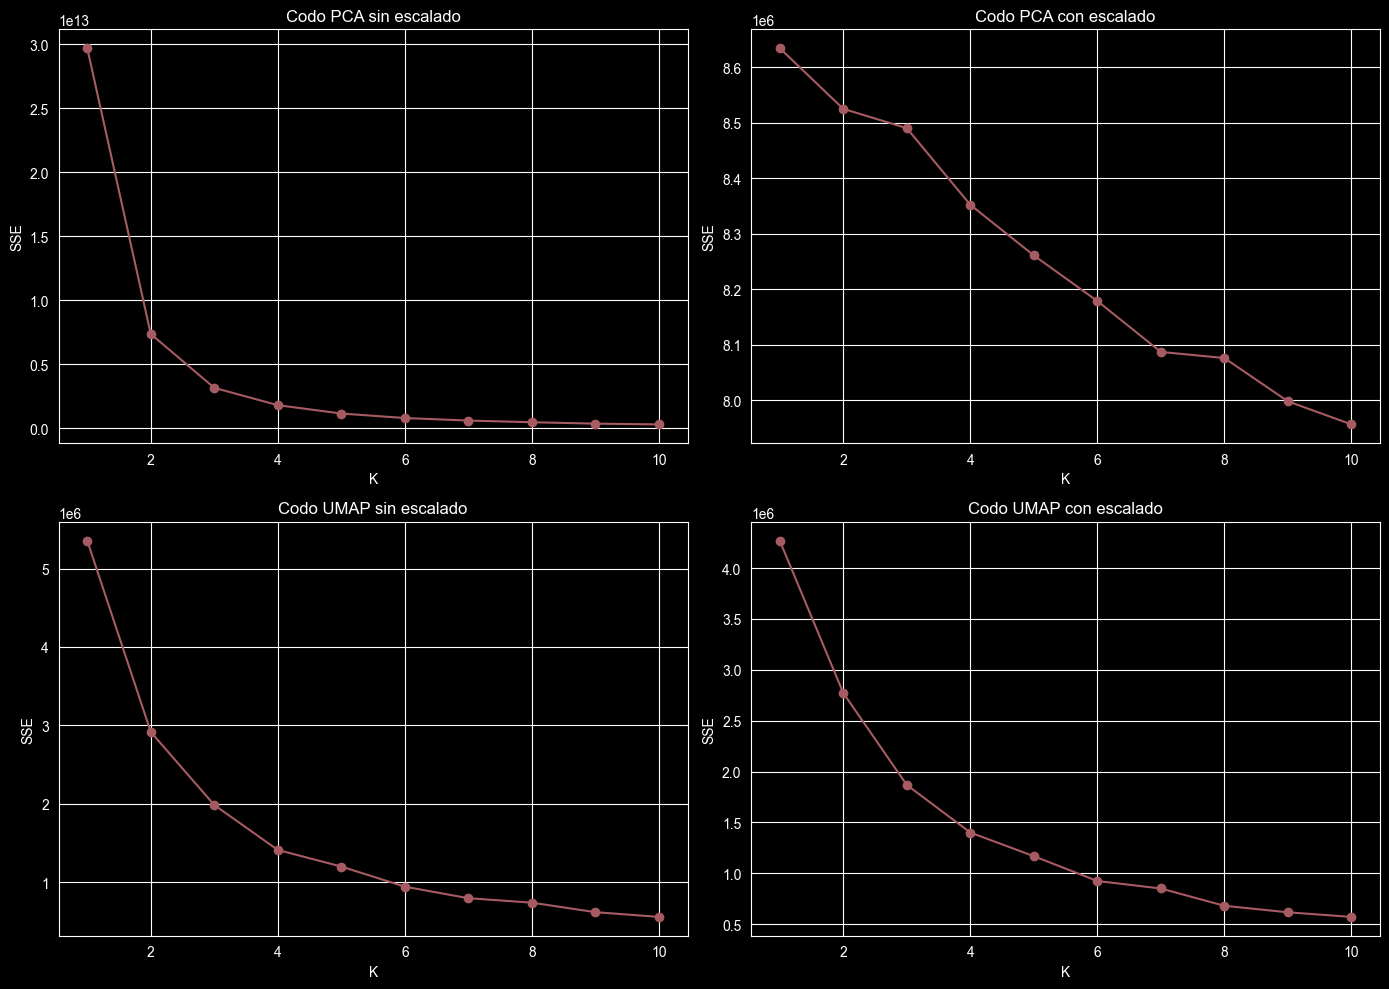

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Función para graficar el método del codo
def plot_elbow(X_data, title, ax):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_data)
        sse.append(kmeans.inertia_)
    ax.plot(range(1, 11), sse, marker='o')
    ax.set_title(title)
    ax.set_xlabel('K')
    ax.set_ylabel('SSE')
    ax.grid(True)

# Gráfica de codo para PCA y UMAP
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_elbow(X_pca, 'Codo PCA sin escalado', axes[0, 0])
plot_elbow(X_pca_scaled, 'Codo PCA con escalado', axes[0, 1])
plot_elbow(X_umap, 'Codo UMAP sin escalado', axes[1, 0])
plot_elbow(X_umap_scaled, 'Codo UMAP con escalado', axes[1, 1])

plt.tight_layout()
plt.show()


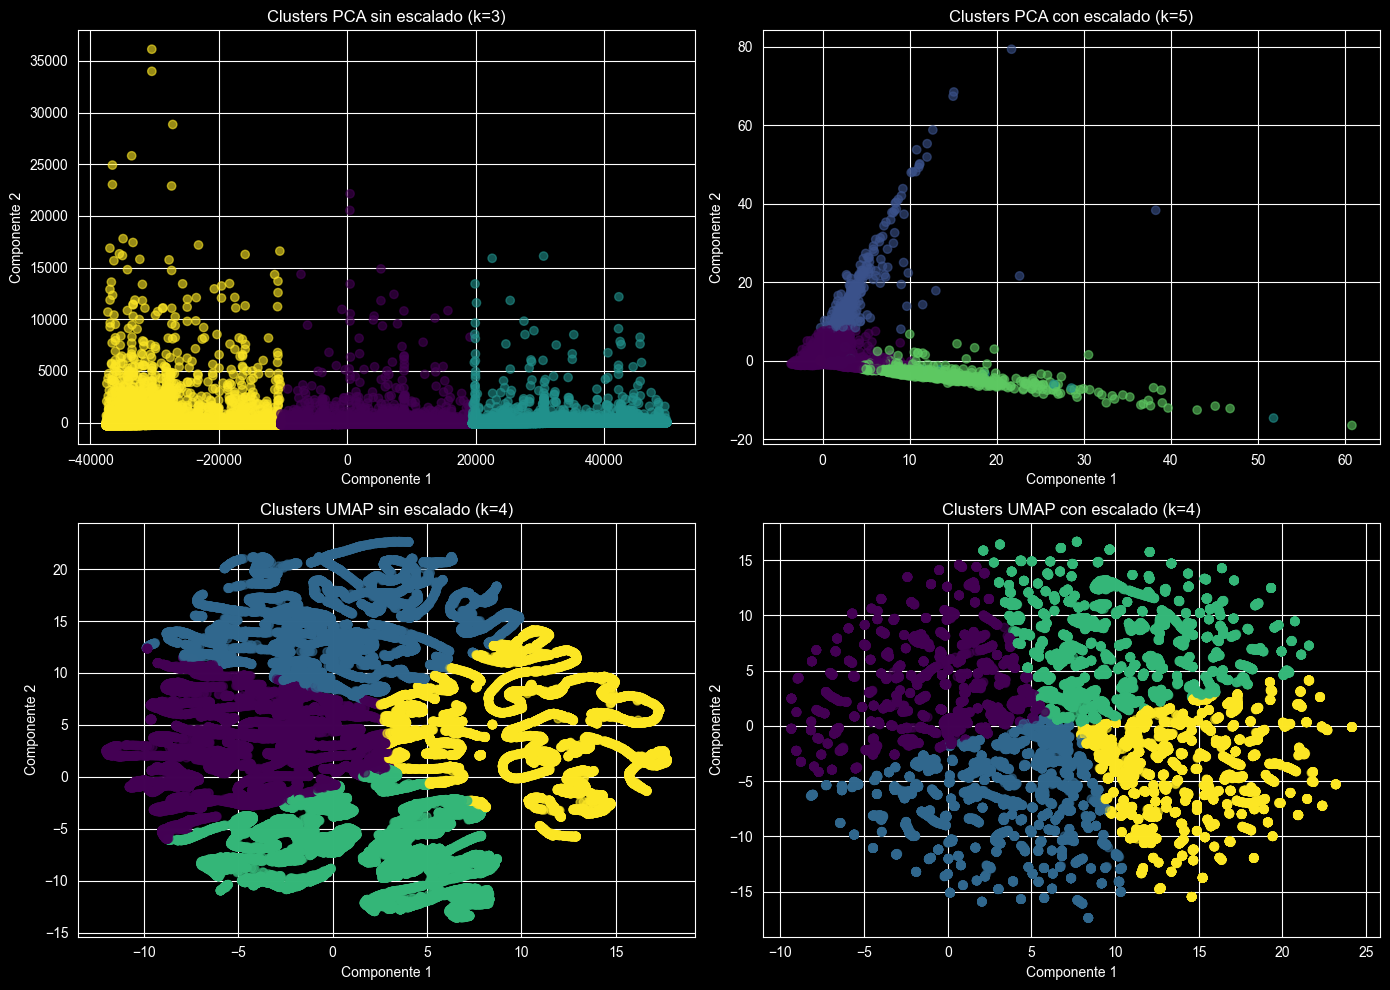

In [21]:
def plot_clusters(X_data, title, ax, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_data)
    ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_clusters(X_pca, 'Clusters PCA sin escalado (k=3)', axes[0, 0], 3)
plot_clusters(X_pca_scaled, 'Clusters PCA con escalado (k=5)', axes[0, 1], 5)
plot_clusters(X_umap, 'Clusters UMAP sin escalado (k=4)', axes[1, 0], 4)
plot_clusters(X_umap_scaled, 'Clusters UMAP con escalado (k=4)', axes[1, 1], 4)

plt.tight_layout()
plt.show()

### DBSCAN

aplicar DBSCAN sobre escalado con distintos valores de K

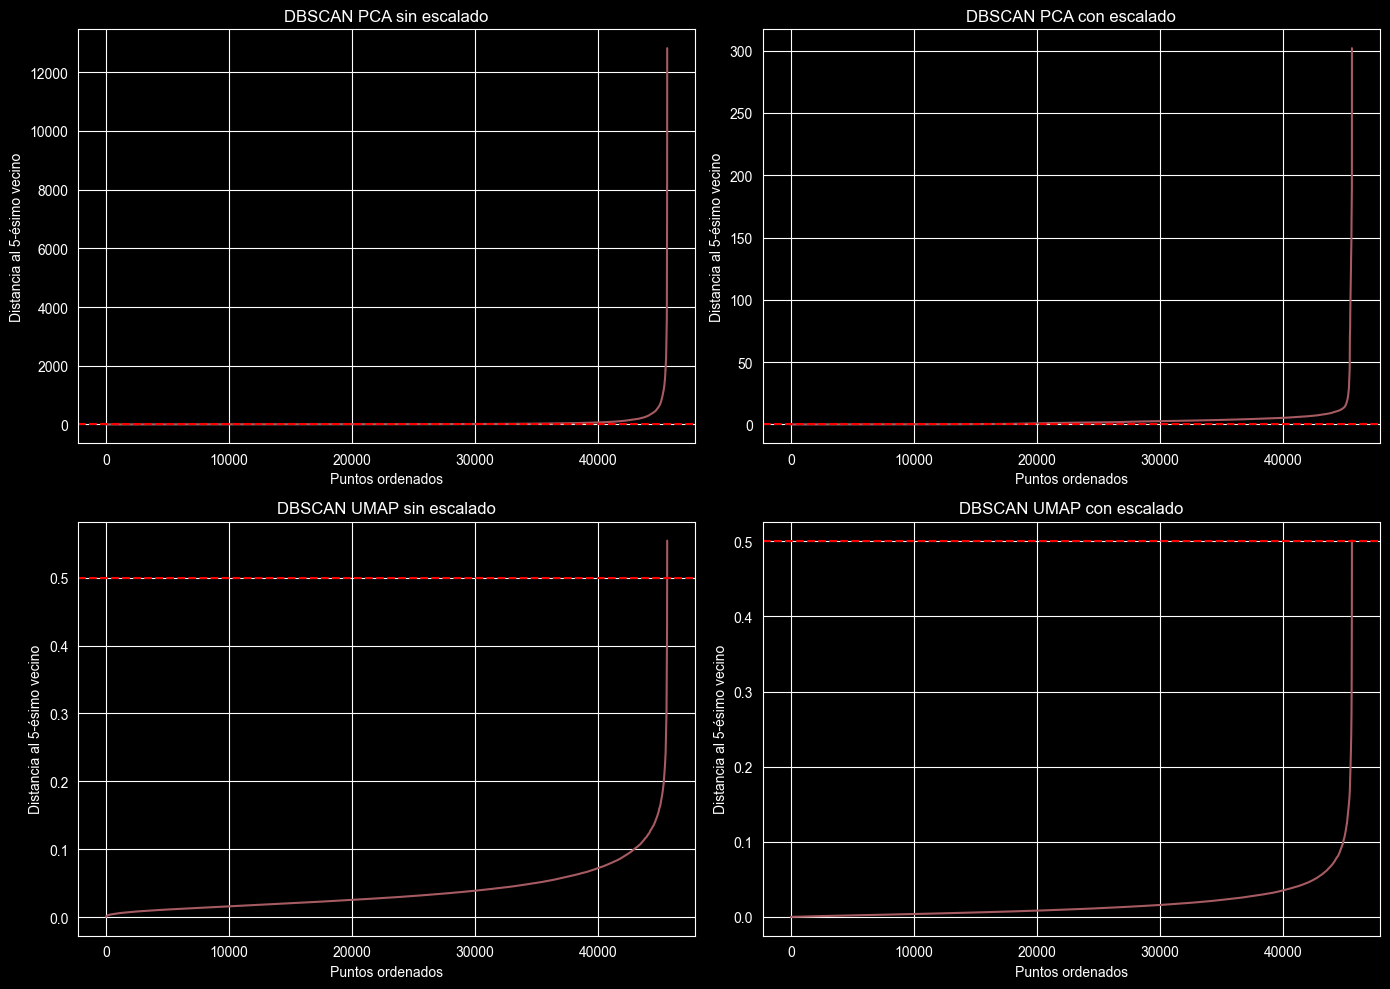

In [22]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

def plot_k_distances(X_data, title, ax, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_data)
    distances, _ = neighbors_fit.kneighbors(X_data)
    k_distances = np.sort(distances[:, k-1])
    ax.plot(k_distances)
    ax.axhline(y=0.5, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Puntos ordenados')
    ax.set_ylabel(f'Distancia al {k}-ésimo vecino')
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_k_distances(X_pca, 'DBSCAN PCA sin escalado', axes[0, 0])
plot_k_distances(X_pca_scaled, 'DBSCAN PCA con escalado', axes[0, 1])
plot_k_distances(X_umap, 'DBSCAN UMAP sin escalado', axes[1, 0])
plot_k_distances(X_umap_scaled, 'DBSCAN UMAP con escalado', axes[1, 1])

plt.tight_layout()
plt.show()


DBSCAN PCA sin escalado: 0 clusters encontrados
DBSCAN PCA con escalado: 0 clusters encontrados
DBSCAN UMAP sin escalado: 38 clusters encontrados
DBSCAN UMAP con escalado: 408 clusters encontrados


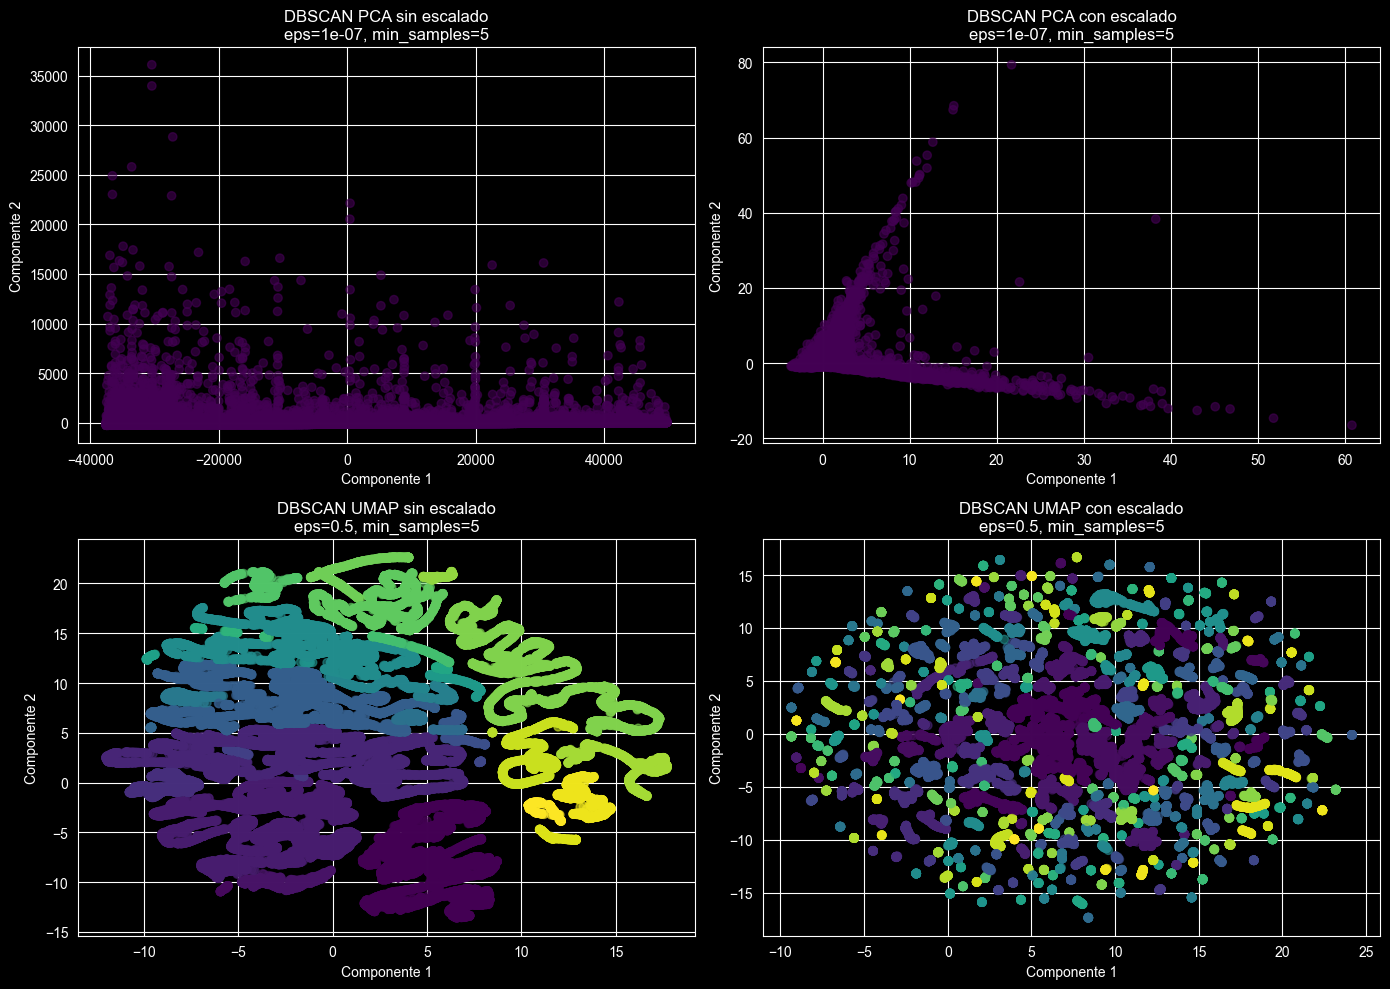

In [23]:
from sklearn.cluster import DBSCAN

def plot_dbscan(X_data, title, ax, eps, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_data)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"{title}: {n_clusters} clusters encontrados")

    scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(f"{title}\neps={eps}, min_samples={min_samples}")
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_dbscan(X_pca, 'DBSCAN PCA sin escalado', axes[0, 0], eps=0.0000001)
plot_dbscan(X_pca_scaled, 'DBSCAN PCA con escalado', axes[0, 1], eps=0.0000001)
plot_dbscan(X_umap, 'DBSCAN UMAP sin escalado', axes[1, 0], eps=0.5)
plot_dbscan(X_umap_scaled, 'DBSCAN UMAP con escalado', axes[1, 1], eps=0.5)

plt.tight_layout()
plt.show()
